In [31]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [32]:
df = pd.read_csv("Retail_Transactions_2000.csv")

In [33]:
df.head(5)

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount
0,T00001,C2824,Female,33,Bengaluru,Fashion,3,4479,2023-03-15,Cash,13437
1,T00002,C1409,Other,20,Pune,Books,5,1051,2023-01-22,Card,5255
2,T00003,C5506,Other,47,Pune,Furniture,1,111,2023-04-18,Wallet,111
3,T00004,C5012,Other,21,Hyderabad,Groceries,5,2946,2023-08-09,Cash,14730
4,T00005,C4657,Female,41,Chennai,Sports,1,3123,2023-09-23,Wallet,3123


In [34]:

print("Shape of dataset:", df.shape)

print("\nColumn names:\n", df.columns.tolist())

print("\nData Types:\n", df.dtypes)

Shape of dataset: (2000, 11)

Column names:
 ['TransactionID', 'CustomerID', 'Gender', 'Age', 'City', 'ProductCategory', 'Quantity', 'Price', 'PurchaseDate', 'PaymentMode', 'TotalAmount']

Data Types:
 TransactionID      object
CustomerID         object
Gender             object
Age                 int64
City               object
ProductCategory    object
Quantity            int64
Price               int64
PurchaseDate       object
PaymentMode        object
TotalAmount         int64
dtype: object


In [35]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 TransactionID      0
CustomerID         0
Gender             0
Age                0
City               0
ProductCategory    0
Quantity           0
Price              0
PurchaseDate       0
PaymentMode        0
TotalAmount        0
dtype: int64


In [36]:
print("\nNumber of Duplicates:", df.duplicated().sum())


Number of Duplicates: 0


In [53]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['City'] = df['City'].fillna(df['City'].mode()[0])
df = df.dropna(subset=['TransactionID', 'ProductCategory'])

In [38]:
df.drop_duplicates(inplace=True)
df['Gender'] = df['Gender'].str.lower().replace({'m': 'male', 'male': 'male', 'f': 'female', 'female': 'female', 'others': 'other', 'other': 'other'})
df['Gender'] = df['Gender'].str.capitalize()
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]

In [39]:
df['TotalAmount'] = df['Quantity'] * df['Price']
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'], errors='coerce')
df['Month'] = df['PurchaseDate'].dt.month_name()
df['DayOfWeek'] = df['PurchaseDate'].dt.day_name()
bins = [0, 25, 40, 60, 100]
labels = ['18-25', '26-40', '41-60', '60+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [40]:

label_cols = ['Gender', 'City', 'ProductCategory', 'PaymentMode']
encoder = LabelEncoder()

for col in label_cols:
    df[col] = encoder.fit_transform(df[col].astype(str))

scaler = MinMaxScaler()
df[['Age', 'Price', 'TotalAmount']] = scaler.fit_transform(df[['Age', 'Price', 'TotalAmount']])


In [41]:
df.head(5)

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount,Month,DayOfWeek,AgeGroup
0,T00001,C2824,0,0.288462,1,3,3,0.893673,2023-03-15,1,0.536495,March,Wednesday,26-40
1,T00002,C1409,2,0.038462,9,1,5,0.194082,2023-01-22,0,0.207094,January,Sunday,18-25
2,T00003,C5506,2,0.557692,9,4,1,0.002245,2023-04-18,3,0.000000,April,Tuesday,41-60
3,T00004,C5012,2,0.057692,4,5,5,0.580816,2023-08-09,1,0.588550,August,Wednesday,18-25
4,T00005,C4657,0,0.442308,2,6,1,0.616939,2023-09-23,3,0.121261,September,Saturday,41-60


In [42]:
print("Remaining missing values:\n", df.isnull().sum())
df.to_csv("Retail_Cleaned.csv", index=False)

Remaining missing values:
 TransactionID      0
CustomerID         0
Gender             0
Age                0
City               0
ProductCategory    0
Quantity           0
Price              0
PurchaseDate       0
PaymentMode        0
TotalAmount        0
Month              0
DayOfWeek          0
AgeGroup           0
dtype: int64


In [43]:
sns.set(style="whitegrid")

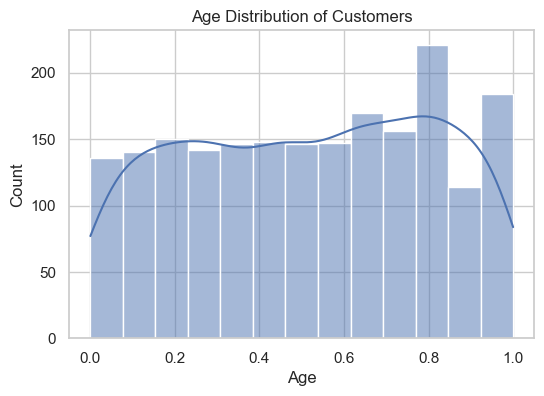

In [44]:
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution of Customers')
plt.show()

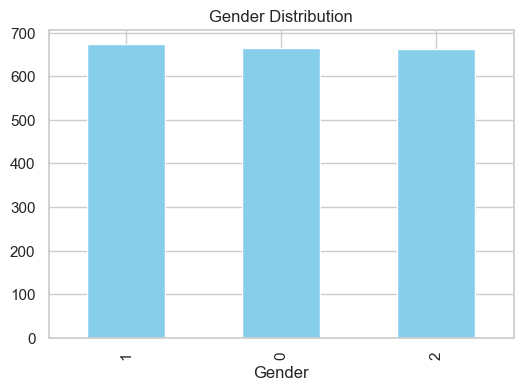

In [45]:
plt.figure(figsize=(6,4))
df['Gender'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Gender Distribution')
plt.show()

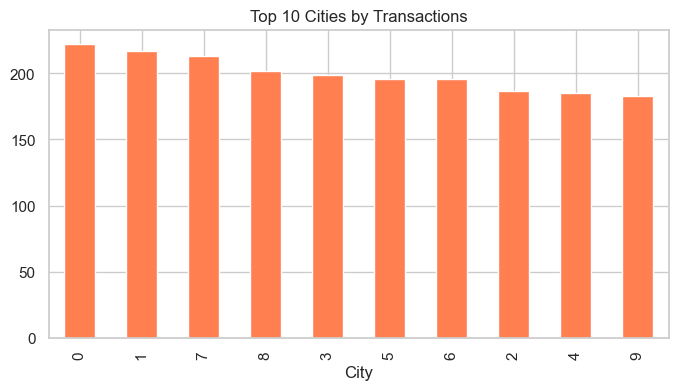

In [46]:
plt.figure(figsize=(8,4))
df['City'].value_counts().head(10).plot(kind='bar', color='coral')
plt.title('Top 10 Cities by Transactions')
plt.show()

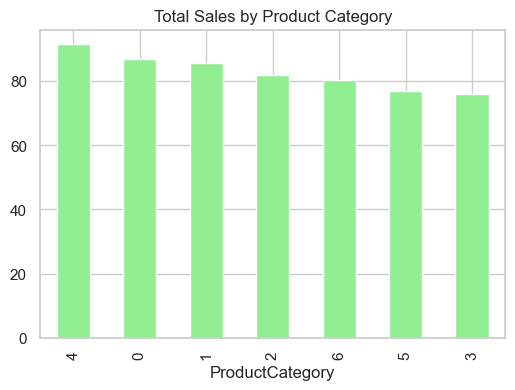

In [47]:
plt.figure(figsize=(6,4))
df.groupby('ProductCategory')['TotalAmount'].sum().sort_values(ascending=False).plot(kind='bar', color='lightgreen')
plt.title('Total Sales by Product Category')
plt.show()

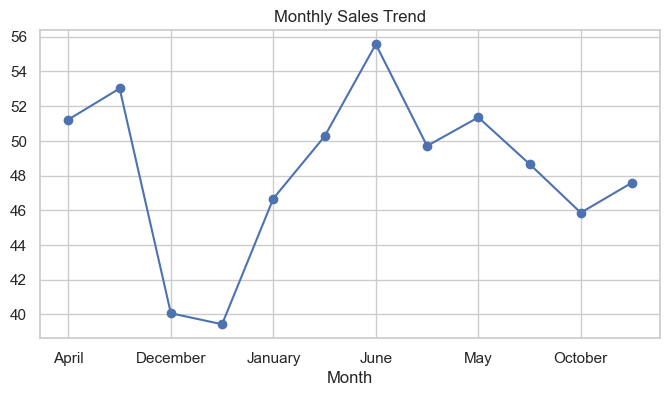

In [48]:
plt.figure(figsize=(8,4))
df.groupby('Month')['TotalAmount'].sum().plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.show()

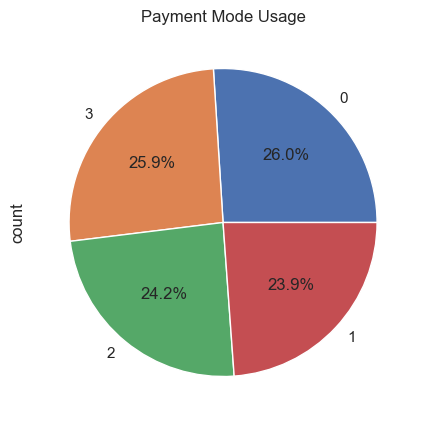

In [49]:
plt.figure(figsize=(5,5))
df['PaymentMode'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Payment Mode Usage')
plt.show()

C:\Users\NANDHANAA M\AppData\Local\Temp\ipykernel_4720\2484461655.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('AgeGroup')['TotalAmount'].mean().plot(kind='bar', color='violet')


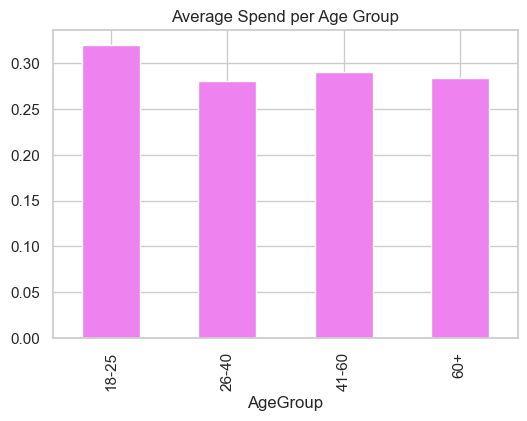

In [50]:
plt.figure(figsize=(6,4))
df.groupby('AgeGroup')['TotalAmount'].mean().plot(kind='bar', color='violet')
plt.title('Average Spend per Age Group')
plt.show()

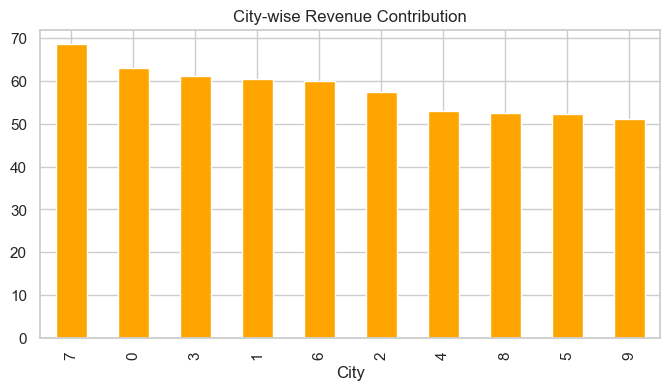

In [51]:
plt.figure(figsize=(8,4))
df.groupby('City')['TotalAmount'].sum().sort_values(ascending=False).head(10).plot(kind='bar', color='orange')
plt.title('City-wise Revenue Contribution')
plt.show()

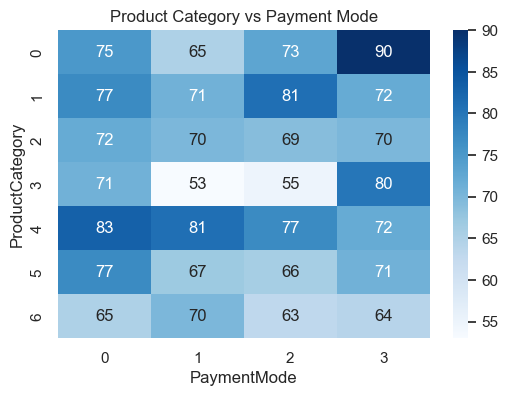

In [52]:
plt.figure(figsize=(6,4))
heatmap_data = pd.crosstab(df['ProductCategory'], df['PaymentMode'])
sns.heatmap(heatmap_data, annot=True, cmap='Blues', fmt='d')
plt.title('Product Category vs Payment Mode')
plt.show()